# Spherical Bessel function overview

Here we look at graphs of the spherical Bessel functions and find the zeros, as needed for the three-dimensional spherical box (infinite well) problem.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from scipy.special import spherical_jn, spherical_yn


**Make some plots of the lowest spherical Bessel functions**

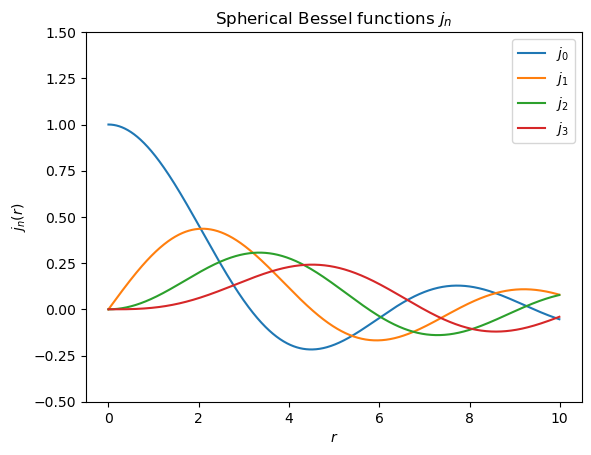

In [2]:
r = np.arange(0.0, 10.0, 0.01)
fig, ax = plt.subplots()
ax.set_ylim(-0.5, 1.5)
ax.set_title(r'Spherical Bessel functions $j_n$')
ax.set_xlabel(r'$r$')
ax.set_ylabel(r'$j_n(r)$')
for l in np.arange(0, 4):
    ax.plot(r, spherical_jn(l, r), label=rf'$j_{l}$')
ax.legend(loc='best');


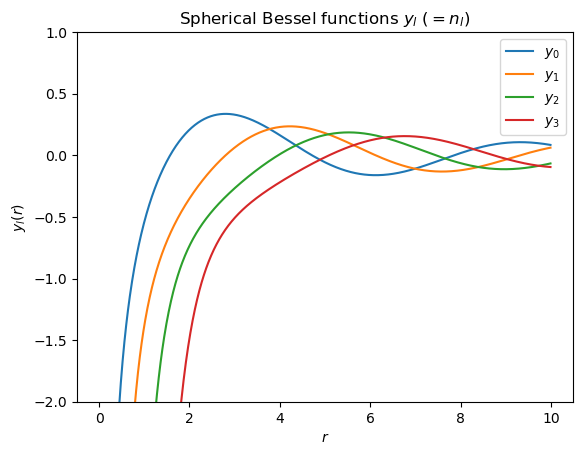

In [3]:
r = np.arange(0.0, 10.0, 0.01)
fig, ax = plt.subplots()
ax.set_ylim(-2.0, 1.0)
ax.set_title(r'Spherical Bessel functions $y_l$ ($ = n_l$)')
ax.set_xlabel(r'$r$')
ax.set_ylabel(r'$y_l(r)$')
for l in np.arange(0, 4):
    ax.plot(r, spherical_yn(l, r), label=rf'$y_{l}$')
ax.legend(loc='best');


**Look for zeros of the spherical Bessel functions $j_{\ell}(\rho)$**

In [4]:
from scipy.optimize import root
# import numpy as np
# from scipy.special import spherical_jn
# import matplotlib.pyplot as plt

def spherical_jn_sensible_grid(n, m, ngrid=100):
    """Returns a grid of x values that should contain the first m zeros, but not too many.
    """
    if (n > 0):
        return np.linspace(n, n + 2*m*(np.pi * (np.log(n)+1)), ngrid)
    else:
        return np.linspace(n, n + 2*m*(np.pi), ngrid)

def spherical_jn_zeros(n, m, ngrid=100):
    """Returns first m zeros of spherical bessel function of order n
    """
    # calculate on a sensible grid
    x = spherical_jn_sensible_grid(n, m, ngrid=ngrid)
    y = spherical_jn(n, x)
    
    # Find m good initial guesses from where y switches sign
    diffs = np.sign(y)[1:] - np.sign(y)[:-1]
    ind0s = np.where(diffs)[0][:m]  # first m times sign of y changes
    x0s = x[ind0s]
    
    def fn(x):
        return spherical_jn(n, x)
    
    return np.array([root(fn, x0).x[0] for x0 in x0s])
    
def show_spherical_jn_zeros(n, m, ngrid=100):
    """Graphical test for the above function
    """
    x = spherical_jn_sensible_grid(n, m, ngrid=ngrid)
    y = spherical_jn(n, x)
    
    plt.plot(x, y)
    [plt.axvline(x0, color='r') for x0 in spherical_jn_zeros(n, m)]
    plt.axhline(0, color='k')

**The first argument to `spherical_jn_zeros` is the value of 

In [14]:
ell = 0        # value of l (or n, if jn)
num_zeros = 5  # number of zeros to find
print(f' l = {ell} zeros:', spherical_jn_zeros(ell, num_zeros))

print(f'\n l = {ell} zeros (divided by pi): ', 
      spherical_jn_zeros(ell, num_zeros) / np.pi)

 l = 0 zeros: [ 3.14159265  6.28318531  9.42477796 12.56637061 15.70796327]

 l = 0 zeros (divided by pi):  [1. 2. 3. 4. 5.]


In [6]:
print(' l = 1 zeros: ', spherical_jn_zeros(1, 5))

 l = 1 zeros:  [ 4.49340946  7.72525184 10.90412166 14.06619391 17.22075527]


In [7]:
print(' l = 2 zeros: ', spherical_jn_zeros(2, 5))

 l = 2 zeros:  [ 5.7634592   9.09501133 12.32294097 15.51460301 18.68903636]
